## Import Library

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier # Import Random Forest
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wrn
%matplotlib inline

sns.set_style('darkgrid')
rcParams['figure.figsize'] = 16,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning)
wrn.filterwarnings('ignore', category = RuntimeWarning)

In [2]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Drop `ID` column

In [4]:
df.drop(['Id'], axis=1, inplace=True)

### Exploratory Data Analysis

In [5]:
df.shape

(150, 5)

In [6]:
df.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


#### Check Missing Values

In [7]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

#### Data Visualization on Target Column

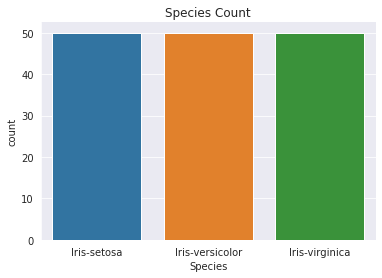

In [9]:
plt.title('Species Count')
sns.countplot(df['Species'])

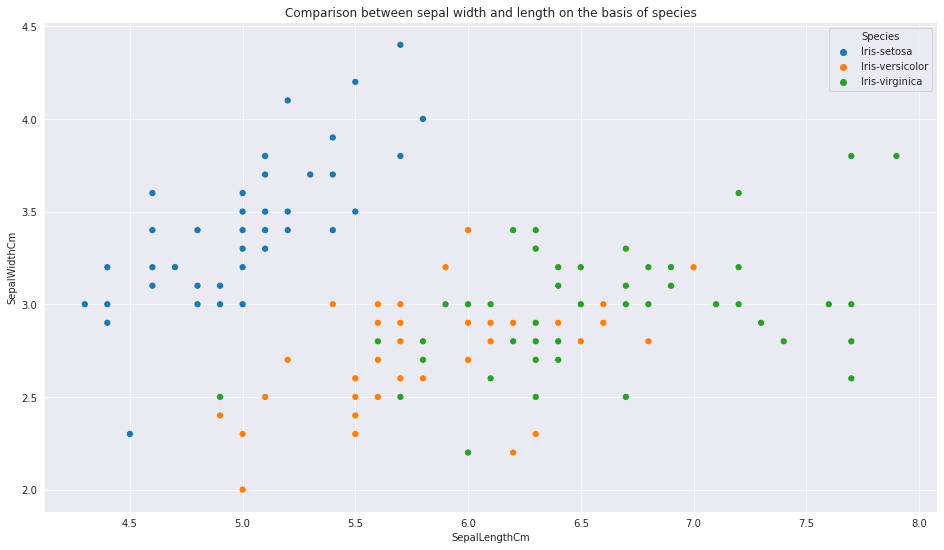

In [10]:
plt.figure(figsize=(16,9))
plt.title('Comparison between sepal width and length on the basis of species')
sns.scatterplot(df['SepalLengthCm'], df['SepalWidthCm'], hue = df['Species'], s= 50);

In [11]:
df[['SepalLengthCm','SepalWidthCm']]

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


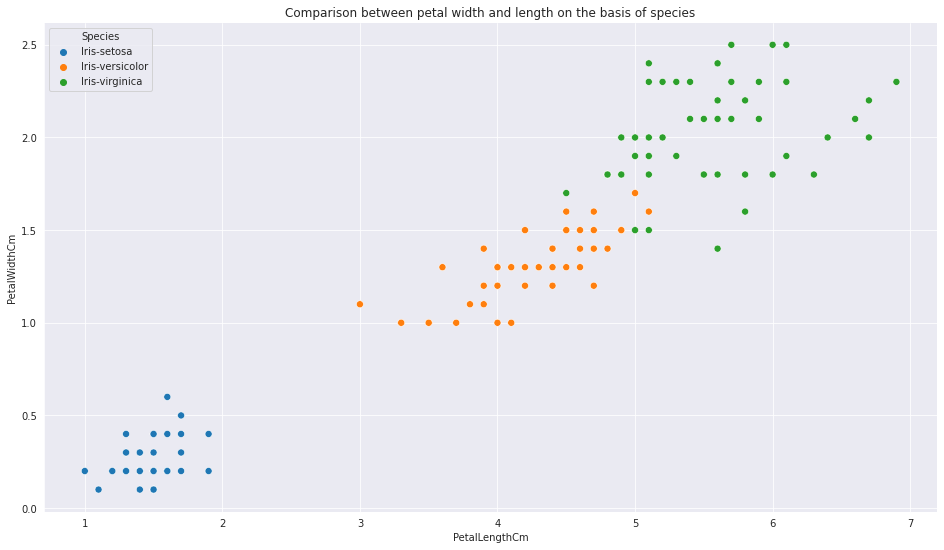

In [12]:
plt.figure(figsize=(16,9))
plt.title('Comparison between petal width and length on the basis of species')
sns.scatterplot(df['PetalLengthCm'], df['PetalWidthCm'], hue = df['Species'], s= 50);

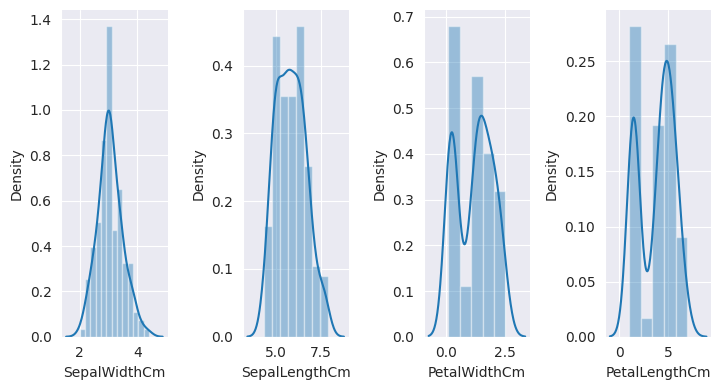

In [13]:
COLS = ['SepalWidthCm', 'SepalLengthCm', 'PetalWidthCm', 'PetalLengthCm']
plt.figure(figsize=(20,4), dpi=100)
i = 1
for col in COLS:
    plt.subplot(1,11,i)
    sns.distplot(df[col])
    i = i+1
plt.tight_layout()
plt.show()

### Data Preparation

In [14]:
COLUMNS = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df[COLUMNS] 
y = df['Species']

In [16]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
41,4.5,2.3,1.3,0.3
24,4.8,3.4,1.9,0.2
121,5.6,2.8,4.9,2.0
47,4.6,3.2,1.4,0.2
53,5.5,2.3,4.0,1.3


In [20]:
X_train.shape

(120, 4)

In [21]:
y_train.head()

41         Iris-setosa
24         Iris-setosa
121     Iris-virginica
47         Iris-setosa
53     Iris-versicolor
Name: Species, dtype: object

In [22]:
X_test.shape

(30, 4)

In [23]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
y_pred = clf.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=clf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.9666666666666667


In [26]:
df.columns[:4]

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [27]:
feature_imp = pd.Series(clf.feature_importances_,index=df.columns[:4]).sort_values(ascending=False)
feature_imp

PetalLengthCm    0.439033
PetalWidthCm     0.427952
SepalLengthCm    0.109943
SepalWidthCm     0.023072
dtype: float64

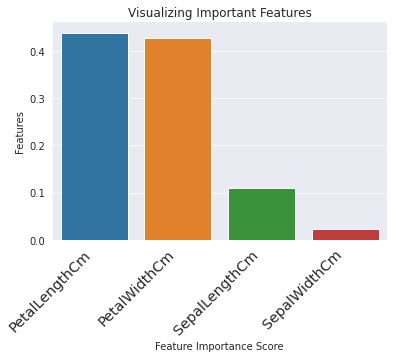

In [29]:
sns.barplot(y=feature_imp, x=feature_imp.index)

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

### Modeling but we drop `SepalWidthCm`

In [30]:
COLUMNS = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df.drop(['Species', 'SepalWidthCm'], axis=1)
y = df['Species']

In [31]:
X.head()

,SepalLengthCm,PetalLengthCm,PetalWidthCm
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
y_pred = clf.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=clf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.9
